In [95]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('Features\Features_no_filtering_ordered.csv')

In [97]:
X_test = data.loc[(data['film'] == 41)].reset_index(drop=True)

X_train = data.loc[(data['film'] != 41)].reset_index(drop=True)

In [98]:
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test = X_test['labels']

train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = X_test['ch']
X_train = X_train.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
X_test = X_test.drop(['labels', 'ch', 'Subj', 'film'], axis=1)

In [99]:
from sklearn.preprocessing import QuantileTransformer

<AxesSubplot:>

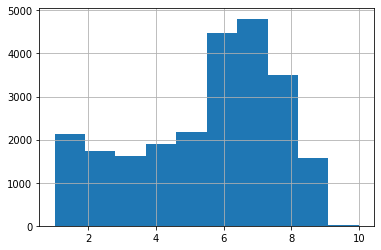

In [100]:
y_train.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

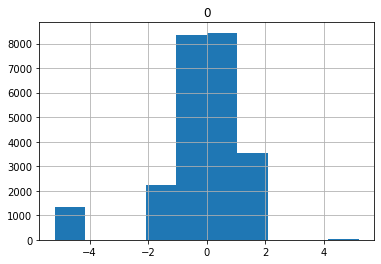

In [101]:
qt_train = QuantileTransformer(output_distribution='normal', copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
y_train.hist()

<AxesSubplot:>

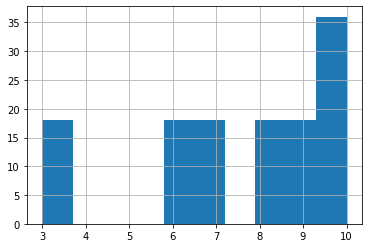

In [102]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

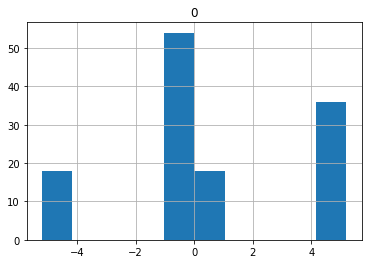

In [103]:
qt_test = QuantileTransformer(output_distribution='normal', copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test).reshape(-1, 1)))
y_test.hist()

In [104]:
from sklearn.linear_model import ElasticNet

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='neg_root_mean_squared_error')

In [107]:
searcher.best_params_["alpha"]

0.001

In [108]:
model = ElasticNet(searcher.best_params_["alpha"]).fit(X_train, y_train)

In [109]:
y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [111]:
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.3114435389449569
1.3222468312822768
1.9321996001005866


In [112]:
preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))

In [113]:
y_test_inv = qt_test.inverse_transform(np.array(y_test).reshape(-1, 1))

In [114]:
print(r2_score(y_test_inv, preds))
print(mean_absolute_percentage_error(y_test_inv, preds))
print(mean_absolute_error(y_test_inv ,preds))

0.8600402982572308
0.10179771327702568
0.46592998675597086


In [115]:
pred = [[0 for j in range(8)] for i in range(42)]
num_chans = [[0 for j in range(8)] for i in range(42)]
labels = [[0 for j in range(8)] for i in range(42)]
lbl = [[0 for j in range(8)] for i in range(42)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
    num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
    labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(4):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

In [116]:
for [l, p] in zip(lbl, predicted):
    print(l, p)

10.0 10.0
10.0 9.966409289266705
6.0 6.957673699187296
8.0 8.0
3.0 4.326912989323562
7.0 7.078547951976833
9.0 8.13521544392919


In [117]:
print(r2_score(lbl, predicted))
print(mean_absolute_percentage_error(lbl, predicted))
print(mean_absolute_error(lbl ,predicted))

0.9089738178688028
0.10179771327702568
0.4659299867559707


In [118]:
import matplotlib.pyplot as plt

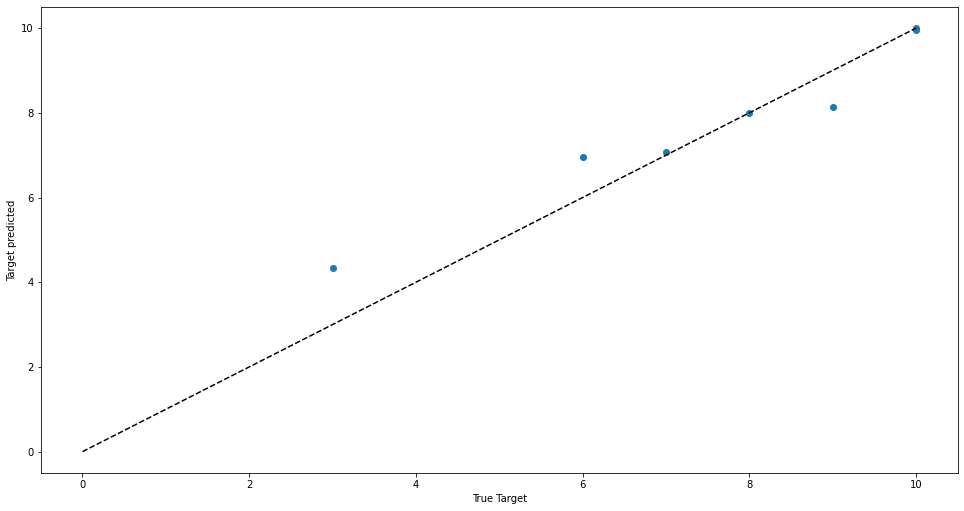

In [119]:
f, ax1 = plt.subplots(sharey=True, figsize=(15,8))

ax1.scatter(lbl, predicted)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')

f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [140]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [141]:
data_all = data.reset_index(drop=True)

In [142]:
X = data.drop(['labels', 'ch', 'film', 'Subj'], axis=1)
X

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,...,Subj_30,Subj_31,Subj_32,Subj_33,Subj_34,Subj_35,Subj_36,Subj_37,Subj_38,Subj_39
0,1.116430e-04,0.218165,0.516112,0.363249,0.549476,0.279508,0.744318,0.788015,0.427071,0.295006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.222589e-04,0.294963,0.412961,0.302930,0.000000,0.284011,0.750000,0.674391,0.210305,0.406826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.987486e-05,0.256055,0.543653,0.298399,0.351609,0.274894,0.750000,0.660297,0.079877,0.553034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.984681e-04,0.346090,0.389749,0.362881,0.495271,0.198436,0.750000,0.627896,0.152767,0.794022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.145732e-04,0.584050,0.108225,0.294442,0.316123,0.309459,0.750000,0.518746,0.556116,0.409080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,4.222781e-10,0.449646,0.778307,0.344409,0.102099,0.547843,0.000000,0.400588,0.684508,0.809331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24044,3.903128e-10,0.734446,0.000000,0.350095,0.079309,0.470511,0.000000,0.701760,0.535743,0.499011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24045,1.437144e-09,0.838142,0.700925,0.440958,0.058883,0.283860,0.000000,0.000000,0.186631,0.140640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24046,5.283381e-10,0.836981,0.838758,0.361852,0.079258,0.480124,0.000000,0.755741,0.309949,0.800837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
y = data['labels']
qt_all = QuantileTransformer(output_distribution='normal', copy=True)
y = pd.DataFrame(qt_all.fit_transform(np.array(y).reshape(-1, 1)))
y

,0
0,0.945616
1,0.945616
2,0.945616
3,0.945616
4,0.945616
...,...
24043,1.942703
24044,1.942703
24045,1.942703
24046,1.942703


In [144]:
print(r2_score(y, predictions))
print(mean_absolute_percentage_error(y, predictions))
print(mean_absolute_error(y, predictions))

0.14702633749868754
3.4350344052487616
1.0058748355204945


In [145]:
from sklearn.feature_selection import SelectFromModel

In [146]:
sfm = SelectFromModel(ElasticNet()).fit(X, y)

print(f"Features selected by SelectFromModel: {X.columns[sfm.get_support()]}")

Features selected by SelectFromModel: Index(['teager_kaiser_energy_6mean', 'time_corr_F8', 'max_cross_corr_C4',
       'fractal_katz', 'phase_lock_val_F3', 'fisher_information',
       'decorr_time', 'max_cross_corr_T8', 'max_cross_corr_P3',
       'spect_corr_C4',
       ...
       'Subj_30', 'Subj_31', 'Subj_32', 'Subj_33', 'Subj_34', 'Subj_35',
       'Subj_36', 'Subj_37', 'Subj_38', 'Subj_39'],
      dtype='object', length=261)


In [147]:
import tqdm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
%%capture cap --no-stderr
AVERAGE_MAE = 0
AVERAGE_MAPE = 0
AVERAGE_R2 = 0
BEST_MODELS_MAE = []
BEST_MODELS_MAPE = []
BEST_MODELS_R2 = []
MIN_MAE = np.inf
MIN_MAPE = np.inf
MAX_R2 = -np.inf
MAX_MAE = -np.inf
MAX_MAPE = -np.inf
MIN_R2 = np.inf
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for film in tqdm.notebook.tqdm(range(41, 49)):
    best = []
    best_features = []
    print('Testing for ', film - 40 , 'film')
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test_inv = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    X_train = X_train.drop(['labels'], axis=1)
    X_test = X_test.drop(['labels'], axis=1)
    
    X_train = X_train.drop(['film', 'ch', 'Subj'], axis=1)
    X_test = X_test.drop(['film', 'ch', 'Subj'], axis=1)
    
    qt_train = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
    qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))
    
    SKB = SelectKBest(score_func=f_regression, k=100)
    X_new = SKB.fit_transform(X_train, y_train)
    indices = SKB.get_support(indices=True)
    selected_features = [X_train.columns[indices[i]] for i in range(len(indices))]
    print('-----------------------------------------------------------------------')
    print('selected features by SKB: ', selected_features)
    print('-----------------------------------------------------------------')
    print('ElasticNet')
    model = ElasticNet(alpha=0.001, l1_ratio=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('ElasticNet r2:', r2_score(y_test, y_pred))
    print('ElasticNet MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('ElasticNet MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('ElasticNet inverted r2:', r2_score(preds, y_test_inv))
    print('ElasticNet inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('ElasticNet inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('ElasticNet inverted by film r2:', r2_score(lbl, predicted))
    print('ElasticNet inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('ElasticNet inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'ElasticNet'})
    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
#     print('DecisionTreeRegressor')
#     model = DecisionTreeRegressor().fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print('DecisionTreeRegressor r2:', r2_score(y_test, y_pred))
#     print('DecisionTreeRegressor MAPE:', mean_absolute_percentage_error(y_test, y_pred))
#     print('DecisionTreeRegressor MAE : ', mean_absolute_error(y_test, y_pred))
#     preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
#     print('DecisionTreeRegressor inverted r2:', r2_score(preds, y_test_inv))
#     print('DecisionTreeRegressor inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
#     print('DecisionTreeRegressor inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
#     pred = [[0 for j in range(8)] for i in range(42)]
#     num_chans = [[0 for j in range(8)] for i in range(42)]
#     labels = [[0 for j in range(8)] for i in range(42)]
#     lbl = [[0 for j in range(8)] for i in range(42)]
#     channels = [[] for i in range(40)]
#     for i in range(len(preds)):
#         pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
#         num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
#         labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
#         channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
#     labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
#     pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
#     labels = np.nan_to_num(labels)
#     pred = np.nan_to_num(pred)
#     predicted = []
#     lbl = []
#     for i in range(len(labels)):
#         if sum(labels[i]) != 0:
#             for j in range(8):
#                 if labels[i][j] != 0:
#                     lbl.append(labels[i][j])  
#                     predicted.append(pred[i][j])
#     print('DecisionTreeRegressor inverted by film r2:', r2_score(lbl, predicted))
#     print('DecisionTreeRegressor inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
#     print('DecisionTreeRegressor inverted by film MAE:', mean_absolute_error(lbl ,predicted))
#     best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'DecisionTreeRegressor'})

#     for [l, p] in zip(lbl, predicted):
#         print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
#     for i in range(33, len(channels)):
#         print('predictions by channel', channels[i])
 

In [ ]:
with open('minmax_full_factor_3.txt', 'w') as f:
    f.write(cap.stdout)